In [1]:
#este notebook está creado únicamente para probar a crear un dataloader que recoja datos de más de un directorio

In [6]:
#importamos los paquetes necesarios
import torch #contiene todas las funciones de PyTorch
import torch.nn as nn #contiene la clase padre de todos los modelos (nn.Module)
import torch.nn.functional as F #esencial para la función de activación 
import torchvision #fundamental para la importación de imágenes
import torchvision.transforms as transforms
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader, ConcatDataset
#importamos también matplotlib.pyplot y numpy para la visualización de las imágenes
import matplotlib.pyplot as plt
import numpy as np
import os

#importamos los paquetes necesarios para el cálculo de las métricas
import sklearn
from sklearn.metrics import accuracy_score, balanced_accuracy_score, f1_score, cohen_kappa_score, roc_auc_score, confusion_matrix
import seaborn as sns

#e importamos el paquete para el cálculo del tiempo de ejecución
import time

In [11]:
#es necesario incluir la siguiente línea para que no se produzcan errores en la representación de las imágenes (entran en conflicto algunos ficheros de matplotlib con los de PyTorch sino)
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

In [3]:
#establecemos el tamaño del batch, la escala de las imágenes y el número de épocas de entrenamiento
batch = 4
escala = 640
epocas = 50

In [4]:
#a continuación definimos la operación que permitirá transformar las imágenes del repositorio en Tensores que puedan ser empleados por PyTorch
transform = transforms.Compose(
    [transforms.ToTensor(), #transforma la imagen de formato PIL a formato tensor
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)), #normaliza el tensor para que la media de sus valores sea 0 y su desviación estándar 0.5
     transforms.Resize((escala, escala))]) #redimensionamos las imágenes

In [9]:
root_dirs = ['Datos/Classified Data/Images/Samsung', 'Datos/Classified Data/Images/OCT']
datasets = []
for root_dir in root_dirs:
    dataset = ImageFolder(root_dir, transform=transform)
    datasets.append(dataset)
    
concat_dataset = ConcatDataset(datasets)

print(f'Tamaño del conjunto de datos de train: {len(concat_dataset)}')

dataloader = DataLoader(concat_dataset, batch_size=batch, shuffle=True, num_workers = 2)

Tamaño del conjunto de datos de train: 206


In [19]:
#establecemos una lista con el nombre de las etiquetas
classes = concat_dataset.datasets[0].classes

IMÁGENES DEL CONJUNTO DE TRAIN


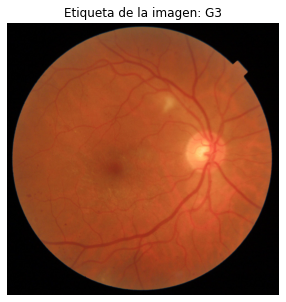

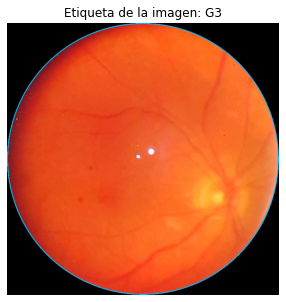

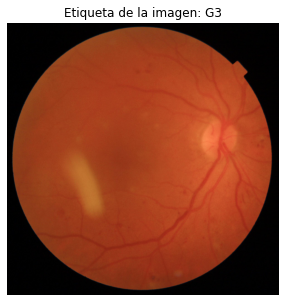

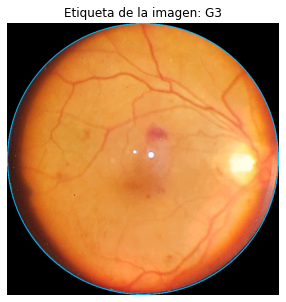

In [22]:
#para comprobar que los loaders funcionan correctamente vamos a probar a cargar las imágenes y mostrarlas
#convertimos el train_loader a iterador, para poder así coger un batch
#el batch está compuesto por una tupla de 2 elementos: las imágenes (tensores en este caso) y las etiquetas asociadas
images, labels = next(iter(dataloader))

#mostramos las imágenes y las labels asociadas
print('IMÁGENES DEL CONJUNTO DE TRAIN')
for i,j in zip(images,labels):
    plt.figure(figsize = (5,5))
    plt.axis('off')
    plt.title(f'Etiqueta de la imagen: {classes[j]}')
    plt.imshow(np.transpose((i/2+0.5).numpy(), (1,2,0)))
    plt.show()
